In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import logging

# =============================== Variables ================================== #
logging.basicConfig(filename="avg-error-numpy.log", filemode='w', format='%(message)s')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
np.random.seed(100)
EPOCH = 10000


In [2]:
def sigmoid(z):
    sig = 1 + np.exp(-z)
    return 1 / sig

def sigmoid_derivative( z):
    return z * (1 - z)

In [3]:
def loss(y_pred, y_targt):
    return np.mean(np.power(y_pred - y_targt, 2))

def loss_derive(true, pred):
    return 2 * (pred - true) / np.size(true)

In [4]:
def plot_loss(epoch_loss):

    '''
    :param train_loss: list of training losses
    :return: saves a plot of the training losses vs epochs with file name loss-numpy.png on current working directory
    '''
    # ========== Please do not edit this function
    plt.xlabel("Training Epoch")
    plt.ylabel("Training Loss")
    plt.plot(epoch_loss)
    plt.savefig("./loss-numpy.png")

In [5]:
class shallow_network:
    def __init__(self, ip_size, hidden_size, op_size, lr=0.01):
        self.lr = lr
        self.w1 = self.init_w(ip_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = self.init_w(hidden_size, op_size)
        self.b2 = np.zeros((1, op_size))

    def init_w(self, x, y):
        return np.random.randn(x, y)
    


    def forward(self, x):
        x = x.reshape(1, -1)  
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, x, y):
        x = x.reshape(1, -1)  
        y = np.array(y).reshape(1, -1)  
        
        y_pred = self.forward(x)
                
        d_l = loss_derive(y,y_pred)
        d_a2 = d_l * sigmoid_derivative(y_pred)
        d_w2 = np.dot(self.a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0, keepdims=True)
        
        d_a1 = np.dot(d_a2, self.w2.T) * sigmoid_derivative(self.a1)
        d_w1 = np.dot(x.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0, keepdims=True)
        
        self.w1 -= self.lr * d_w1
        self.b1 -= self.lr * d_b1
        self.w2 -= self.lr * d_w2
        self.b2 -= self.lr * d_b2


In [6]:
X = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            X.append([i,j,k])
X = np.array(X)

In [7]:
Y = np.any(X==1,axis=1).astype(int)

In [8]:
# =========== Build Neural Net Model
input_size = 3
hidden_size = 2
output_size = 1

In [9]:
model = shallow_network(input_size,hidden_size,output_size,lr=0.05)

0.1563860330983661
0.3948568752278628
0.32654649383728523
0.34800640856579335
0.39981274758446
0.416446814349208
0.351891767317496
0.36326107963903725
0.1864046727593982
0.34587544913179746
0.282883011241369
0.2992301265957459
0.36045740211333904
0.3722876463597735
0.3113331227452733
0.31700717708167175
0.21772036826540694
0.3015121295699462
0.24442896516646495
0.2563500728982633
0.32469611954737637
0.3321245177661634
0.2753674934294055
0.27615394505280766
0.24924692971657578
0.26251251220248023
0.2114171012599048
0.2196908933009557
0.29288804566517296
0.2964550880711633
0.24411861058147744
0.24091096208760845
0.280067588477754
0.2289741758535417
0.18357190657260017
0.1889473497158935
0.2650177375550935
0.26530716401142423
0.21732970084058637
0.21098161280682745
0.3095211753077961
0.2005464283422738
0.1603275842362784
0.1634575527730384
0.24082368061910517
0.23839606162950228
0.19453394942242344
0.18579079130350692
0.3372044377350028
0.1766433775802493
0.1410115160488557
0.142430897367

/tmp/ipykernel_3414/257200040.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tstr += str(x) + " " + str(y_target) + " " + str(round(float(y_pred), 1))


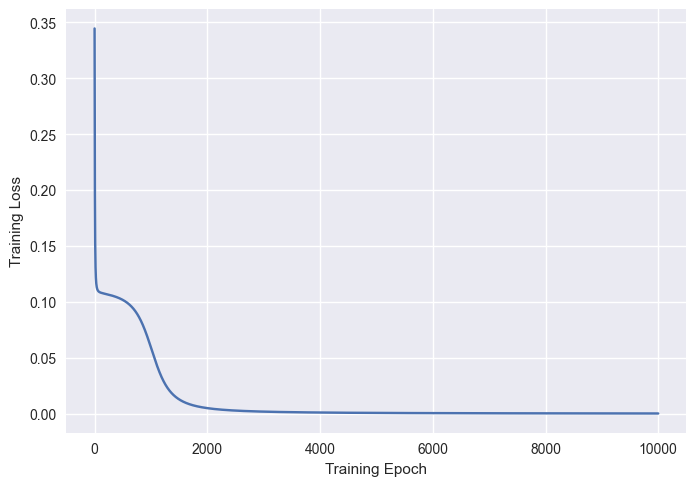

In [10]:

# =========== Write code for training the model
train_loss = [] # Use this list to store training loss per epoch
for i in range(EPOCH): # Total training epoch is 10000
    epoch_loss = []
    for j in range(len(X)):
        x = X[j]
        y_target = Y[j]
        y_pred = model.forward(x)
        _loss = loss(y_pred, y_target)
        print(_loss)
        epoch_loss.append(_loss)
        model.backward(x, y_target)
    train_loss.append(sum(epoch_loss) / len(X))

# =========== Plot Epoch Losses
plot_loss(train_loss)

# =========== Predict
error = []
logger.info("===================")
logger.info("   X    Y  Y' ")
logger.info("===================")
for i in range(Y.shape[0]):
    tstr = ""
    x = X[i]
    y_target = Y[i]
    y_pred = model.forward(x)
    tstr += str(x) + " " + str(y_target) + " " + str(round(float(y_pred), 1))    
    logger.info(tstr)
    error.append(loss(y_pred, y_target))
logger.info("Average Error: " + str(round(np.mean(error), 5)))